#  19CSE305:Machine Learning

## Multiple Linear Regression:Gradient Descent

The **labels(output)** depends on **multiple features(input)**. The goal is to find an optimum number also called a weight for each feature so that the model can predict accurately.


1.PNG


2.png

w Represents multiple slopes

**Cost Fucntion:**

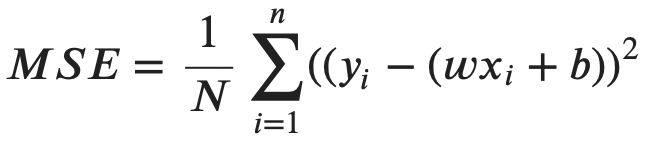


## Importing Modules

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Input Data

In [ ]:
# Input the data set
df = pd.read_csv("/content/drive/MyDrive/ML_Btech/LAB/LAB7/50_Startups.csv")
df.head(5)
##In case you want to view data plots un-comment the following lines
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
#fig.figsize = (10, 10)
#ax[0, 0].scatter(df['Profit'], df['R&D Spend'],color = 'red')
#ax[0, 1].scatter(df['Profit'], df['Administration'],color = 'yellow')
#ax[1, 0].scatter(df['Profit'], df['Marketing Spend'], color ='green')
#ax[1, 1].scatter(df['Profit'], df['State'],color = 'blue')
#plt.tight_layout()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

## Define features and labels

Separating all the features as x and labels(output) as y. So the columns are features(x) and column is label(y)

In [ ]:
# Define features and labels
x = df.iloc[:,:-1].values # Selecting all columns except the last column
y = df.iloc[:,-1].values
print("Sample x:",  x[0:5,:])
print("Sampe y: ", y[0:5])

Sample x: [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
Sampe y:  [192261.83 191792.06 191050.39 182901.99 166187.94]


## Converting text into columns

* Since the ‘State’ column has data in text form we change it to three 
different columns namely- ‘New York’, ‘Florida’, ‘California’.
* So if the first row had ‘State’ column value as ‘New York’ then now it has three new columns where only the ‘New York’ column has a value of 1 and the other two have value of zero.

NOTE: Explore Sklearn ColumnTransformer:  https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [ ]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


## Scaling Dataset

Data scling will help the gradient descent to converges more quickly towards minima.

In [ ]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
#print("Data before Scaling:\n", x[0:10,:])
sc = StandardScaler()
x = sc.fit_transform(x)
#print("Data AfterScaling:\n", x[0:10,:])

## Separating training and testing data

In [ ]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)


## Implementing the logic for cost function and gradient descent function

In [ ]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

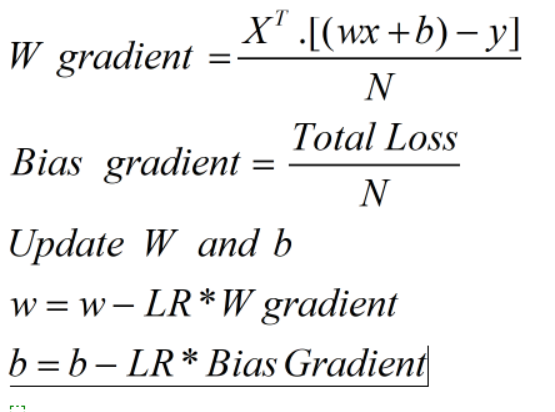

In [ ]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y) #dw
        bias_gradient = np.sum(loss) / len(y) #db
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

## Calculating weights and bias

In [ ]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)
#38791988.606615104 is lowest cost achieved

Cost at epoch 0 is: 6989316078.6237135
Cost at epoch 1500 is: 93910079.250253
Cost at epoch 3000 is: 52213406.46017958
Cost at epoch 4500 is: 44053387.93102421
Cost at epoch 6000 is: 41718884.2933599
Cost at epoch 7500 is: 41048136.36983319
Cost at epoch 9000 is: 40855409.29807189
Cost at epoch 10500 is: 40800032.694304764
Cost at epoch 12000 is: 40784121.23860737
Cost at epoch 13500 is: 40779549.37241818


## Plotting the cost function

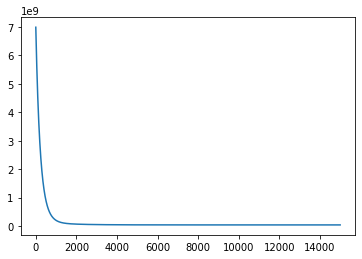

In [ ]:
# Plotting the cost
plt.plot(c)

## Predicting values

In [ ]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
y_pred = predict(Xtest, w, b)

## Calculating accuracy

In [ ]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [ ]:
r2score(y_pred, Ytest)

0.9397254670323117

# **Excercise 2**

Apply Multiple Linear regression on Car data set available [here](https://drive.google.com/file/d/1_JXqxkmiFIwv3XKGO8T2GhBvcXhj-tdd/view?usp=sharing).